<a href="https://colab.research.google.com/github/cemileturkel/Hr_Analytics_Job_Prediction-Logistic_Regression/blob/main/Hr_Analytics_Job_Prediction_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# read file

df = pd.read_csv('/content/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Data preprocessing: Preparing categorical variables and features

df['salary'] = LabelEncoder().fit_transform(df['salary'])  # salary column encoding
df['Department'] = LabelEncoder().fit_transform(df['Department'])  # Department column encoding
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [ ]:
# Properties and target variable

X = df[['satisfaction_level', 'last_evaluation', 'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident', 'promotion_last_5years', 'Department', 'salary']]
y = df['left']

In [ ]:
# Splitting the data into training and test sets

X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
11809,0.93,0.51,4,110,3,0,0,6,1
970,0.38,0.46,2,147,3,0,0,8,1
1598,0.83,0.94,5,273,5,0,0,1,2
11804,0.64,0.88,3,252,2,0,0,7,1
2582,0.58,0.86,5,271,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...
5191,0.52,0.96,4,246,3,0,0,8,1
13418,0.49,0.65,4,233,7,0,0,7,2
5390,0.66,0.73,5,249,2,0,0,8,2
860,0.79,1.00,4,218,5,0,0,7,1


In [ ]:
# Standardize data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)
X_test = scaler.transform(X_test_df)

X_train.shape, X_test.shape

((13499, 9), (1500, 9))

In [ ]:
# 1. Logistic Regression Model

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
example_worker_info = [[0.52, 0.96, 4, 246, 3, 0, 0, 8, 1]]
example_worker_info = scaler.transform(example_worker_info)

predict = log_reg.predict(example_worker_info)
# estimated employee type 0: not quit, 1: quit
predict

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# Calculate the accuracy of the model

y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.752


In [ ]:
X_test_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
6723,0.65,0.96,5,226,2,1,0,5,2
6473,0.88,0.80,3,166,2,0,0,0,1
4679,0.69,0.98,3,214,2,0,0,7,1
862,0.41,0.47,2,154,3,0,0,7,1
7286,0.87,0.76,5,254,2,1,0,3,1
...,...,...,...,...,...,...,...,...,...
2655,0.58,0.97,5,202,2,0,0,0,1
4606,0.82,0.68,3,140,2,0,0,7,1
10904,0.58,0.86,4,168,2,0,0,6,2
14862,0.09,0.88,6,269,4,0,0,9,2


In [ ]:
y_test.to_list()

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [ ]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# 2. Decision Tree Model

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred_tree = tree_clf.predict(X_test)
y_pred_tree

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# Performance evaluation

log_reg_report = classification_report(y_test, y_pred_log_reg)
tree_report = classification_report(y_test, y_pred_tree)

log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

(log_reg_report, log_reg_accuracy, tree_report, tree_accuracy)

('              precision    recall  f1-score   support\n\n           0       0.80      0.91      0.85      1155\n           1       0.43      0.24      0.31       345\n\n    accuracy                           0.75      1500\n   macro avg       0.61      0.57      0.58      1500\nweighted avg       0.71      0.75      0.72      1500\n',
 0.752,
 '              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98      1155\n           1       0.97      0.92      0.94       345\n\n    accuracy                           0.97      1500\n   macro avg       0.97      0.95      0.96      1500\nweighted avg       0.97      0.97      0.97      1500\n',
 0.9733333333333334)

In [ ]:
# show the results
print('Logistic Regression Model:')
print(log_reg_report)
print('Accuracy:', log_reg_accuracy)
print('Decision Tree Model:')
print(tree_report)
print('Accuracy:', tree_accuracy)

Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1155
           1       0.43      0.24      0.31       345

    accuracy                           0.75      1500
   macro avg       0.61      0.57      0.58      1500
weighted avg       0.71      0.75      0.72      1500

Accuracy: 0.752
Decision Tree Model:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1155
           1       0.97      0.92      0.94       345

    accuracy                           0.97      1500
   macro avg       0.97      0.95      0.96      1500
weighted avg       0.97      0.97      0.97      1500

Accuracy: 0.9733333333333334


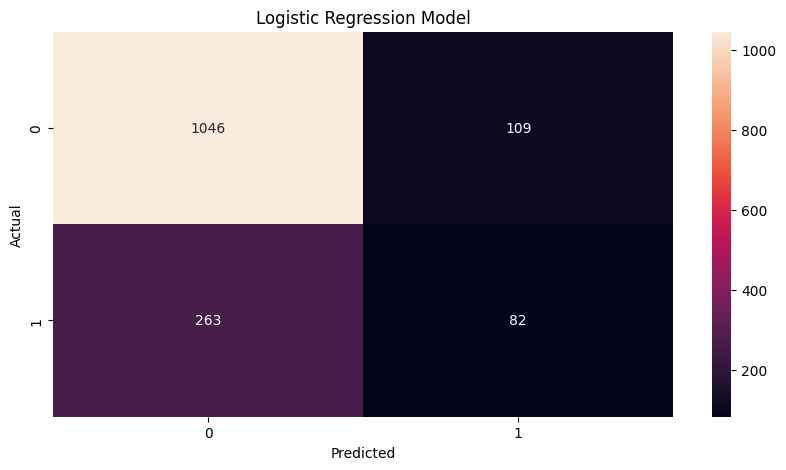

In [ ]:
# draw the results

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(y_test, y_pred_log_reg, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d')
plt.title('Logistic Regression Model')
plt.show()

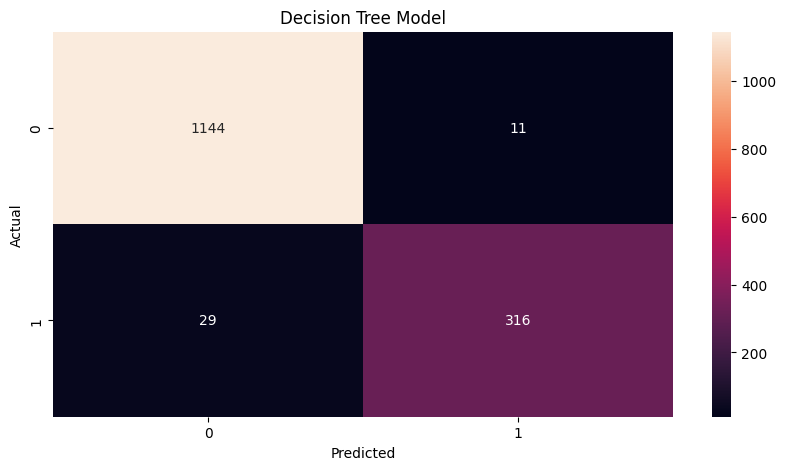

In [ ]:
# draw the results

plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(y_test, y_pred_tree, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d')
plt.title('Decision Tree Model')
plt.show()